
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of investments options from the Syntech Securian 401K.  Construct portfolios from the Investment Options in the Syntech Securian 401K and examine the results of different weighting schemes.  See investPerfPlan.pdf.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

# Display all rows.
pd.set_option('display.max_rows', None)

# Do not truncate column names.
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# Set size of inline plots.
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['securian-401k']
risk_free_rate = 1.10
annual_returns = '5 Yr'

In [5]:
# Fetch Investment Options - all values annualized.
df = bb.fetch(investment_universe, risk_free_rate, annual_returns)
df

,Investment Option,Asset Class,1 Yr,3 Yr,5 Yr,Std Dev,Annual Returns,Sharpe Ratio
0,Minnesota Life General Account,Risk-Free Asset,0.20,0.20,0.20,0.00,0.20,0.00
1,Securian AM Money Market,Cash Equivalents:Money Markets,1.47,0.62,1.15,0.32,1.15,0.16
2,Hotchkis & Wiley High Yield I,US Bonds:High Yield,-9.82,-0.05,1.10,12.69,1.10,0.00
3,Loomis Sayles Investment Grade Bond Adm,US Bonds:Investment Grade,-11.32,-0.22,1.54,6.96,1.54,0.06
4,Metropolitan West Total Return Bd Admin,US Bonds,-14.77,-2.76,0.09,6.49,0.09,-6.55
5,Columbia Limited Duration Credit Adv,US Bonds,-6.06,-0.40,1.26,5.27,1.26,0.03
6,Columbia Contrarian Core,US Stocks,-18.40,7.44,8.57,12.98,8.57,0.58
7,Securian AM S&P 500 Index,US Stocks:Large Cap,-18.22,7.44,9.18,21.12,9.18,0.38
8,ClearBridge Large Cap Growth,US Stocks:Growth,-32.13,2.65,7.48,23.08,7.48,0.28
9,Morgan Stanley Advantage Large Growth,US Stocks:Growth,-52.73,-7.15,1.07,31.24,1.07,-0.94


In [6]:
# Rank.
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Class', num_per_group=3)
rank

,Investment Option,Asset Class,1 Yr,3 Yr,5 Yr,Std Dev,Annual Returns,Sharpe Ratio
6,Columbia Contrarian Core,US Stocks,-18.40,7.44,8.57,12.98,8.57,0.58
10,Schwab Fundamental US Large Company Idx,US Stocks:Large Cap,-6.95,10.07,9.70,22.35,9.70,0.38
7,Securian AM S&P 500 Index,US Stocks:Large Cap,-18.22,7.44,9.18,21.12,9.18,0.38
3,Loomis Sayles Investment Grade Bond Adm,US Bonds:Investment Grade,-11.32,-0.22,1.54,6.96,1.54,0.06
5,Columbia Limited Duration Credit Adv,US Bonds,-6.06,-0.40,1.26,5.27,1.26,0.03
2,Hotchkis & Wiley High Yield I,US Bonds:High Yield,-9.82,-0.05,1.10,12.69,1.10,0.00
0,Minnesota Life General Account,Risk-Free Asset,0.20,0.20,0.20,0.00,0.20,0.00
18,Cohen & Steers Real Estate Securities,Real Estate,-27.11,-0.28,0.70,22.87,0.70,-9.15
16,TIAA-CREF International Eq Idx Instl,Global Stocks,-14.22,1.03,1.70,20.88,1.70,0.03
17,Invesco Oppenheimer International Gr R5,Global Stocks,-27.11,-0.28,0.70,22.87,0.70,-9.15


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# Put your "age" in bonds and the rest in stocks.
age_portfolio = {
    'Title': 'Age Portfolio',
    'Securian AM S&P 500 Index': 0.50,
    'Metropolitan West Total Return Bd Admin': 0.50
}

# Put your "age" in Short Term Treasuries and the rest in stocks.
age2_portfolio = {
    'Title': 'Age2 Portfolio',
    'Securian AM S&P 500 Index': 0.50,
    'Minnesota Life General Account': 0.50
}

# Top dogs - top performer by sharpe ratio in each Asset Class, equal weights.
top_dog_portfolio = {
    'Title': 'Top Dog Portfolio',
    'Securian AM S&P 500 Index': 1/7,
    'Loomis Sayles Investment Grade Bond Adm': 1/7,
    'Minnesota Life General Account': 1/7,
    'Delaware Ivy Securian Real Estate Sec Y': 1/7,
    'TIAA-CREF International Eq Idx Instl': 1/7,
    'Securian AM Money Market': 1/7,
    'Vanguard LifeStrategy Growth Inv': 1/7
}

# 50% S&P 500, 50% bonds
fifty_fifty_portfolio = {
    'Title': 'Fifty Fifty Portfolio',
    'Securian AM S&P 500 Index': 1/2,
    'Metropolitan West Total Return Bd Admin': 1/2
}

# 1/3 S&P 500, 1/3 bonds, 1/3 fixed income.
thirds_portfolio = {
    'Title': 'Thirds Portfolio',
    'Securian AM S&P 500 Index': 1/3,
    'Metropolitan West Total Return Bd Admin': 1/3,
    'Minnesota Life General Account': 1/3
}

# Dave Ramsey: 25% Growth and income, 25% Growth, 25% Aggressive growth, 25% International.
dave_ramsey_portfolio = {
    'Title': 'Dave Ramsey Portfolio',
    'Securian AM S&P 500 Index': 1/4,
    'ClearBridge Large Cap Growth': 1/4,
    'Morgan Stanley Advantage Large Growth': 1/4,
    'Invesco Oppenheimer International Gr R5': 1/4   
}

# Warren Buffett Retirement Fund: 90% S&P500, 10% Short Term Treasuries (sub General Account).
warren_buffett_portfolio = {
    'Title': 'Warren Buffet Portfolio',
    'Securian AM S&P 500 Index': 0.90,
    'Minnesota Life General Account': 0.10
}

# https://www.forbes.com/sites/baldwin/2016/07/25/eight-famous-portfolios/#42c50d7d5cce
# american households: 25% real estate, 30% stocks, 30% fixed income, 5% cash, 10% alternatives
american_households_portfolio = {
    'Title': 'American Households Portfolio',
    'Delaware Ivy Securian Real Estate Sec Y': 0.25,
    'Securian AM S&P 500 Index': 0.30,
    'Minnesota Life General Account': 0.30,
    'Securian AM Money Market': 0.05,
    'Fidelity Emerging Markets Idx': 0.10
}

# Janet Yellen: 50% fixed income, 40% S&P500, 10% cash.
janet_yellen_portfolio = {
    'Title': 'Janet Yellen Portfolio',
    'Minnesota Life General Account': 0.50,
    'Securian AM S&P 500 Index': 0.40,
    'Securian AM Money Market': 0.10
}

# securian-401k, risk off: 100% fixed income divided between risk free asset, bond fund, and money market..
risk_off_portfolio = {
    'Title': 'Risk Off Portfolio',
    'Minnesota Life General Account': 1/3,
    'Metropolitan West Total Return Bd Admin': 1/3,
    'Securian AM Money Market': 1/3
}

# securian-401k, risk on: 100% US stocks bevided between large, emerging markets, and small cap
risk_on_portfolio = {
    'Title': 'Risk On Portfolio',
    'Morgan Stanley Advantage Large Growth': 1/3,
    'Invesco Oppenheimer International Gr R5':1/3,
    'Vanguard Small Cap Growth Index Admiral': 1/3
}

# Everything ranked.
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

### Custom Portfolios

In [8]:
# My portfolio.
my_portfolio = {
    'Title': 'My Portfolio',

}

# fja0568 current allocations.
fja_portfolio = {
    'Title': 'Farrell Portfolio',
    'Minnesota Life General Account': 0.10,
    'Metropolitan West Total Return Bd Admin': 0.40,
    'Securian AM S&P 500 Index': 0.50
}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above.
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved.
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio.
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses,
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': 'Equal',
                          'US Stocks': 0.50,
                          'US Bonds': 0.40,
                          'Risk-Free Asset': 0.10},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'Annual Returns'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio.
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,Columbia Contrarian Core,Schwab Fundamental US Large Company Idx,Securian AM S&P 500 Index,Loomis Sayles Investment Grade Bond Adm,Columbia Limited Duration Credit Adv,Hotchkis & Wiley High Yield I,Minnesota Life General Account,Cohen & Steers Real Estate Securities,TIAA-CREF International Eq Idx Instl,Invesco Oppenheimer International Gr R5,Fidelity Emerging Markets Idx,Securian AM Money Market,Ranked Portfolio
Annual Returns,8.57,9.70,9.18,1.54,1.26,1.10,0.20,0.70,1.70,0.70,-1.68,1.15,5.14
Std Dev,12.98,22.35,21.12,6.96,5.27,12.69,0.00,22.87,20.88,22.87,20.78,0.32,10.41
Sharpe Ratio,0.58,0.38,0.38,0.06,0.03,0.00,0.00,-9.15,0.03,-9.15,-57.77,0.16,0.39
Weight,0.16,0.18,0.17,0.16,0.13,0.11,0.10,0.00,0.00,0.00,0.00,0.00,1.00
Worst Typical Down Year,-17.39,-35.00,-33.06,-12.38,-9.28,-24.28,0.20,-45.04,-40.06,-45.04,-43.24,0.51,-15.69
Black Swan,-30.37,-57.35,-54.18,-19.34,-14.55,-36.97,0.20,-67.91,-60.94,-67.91,-64.02,0.19,-26.10


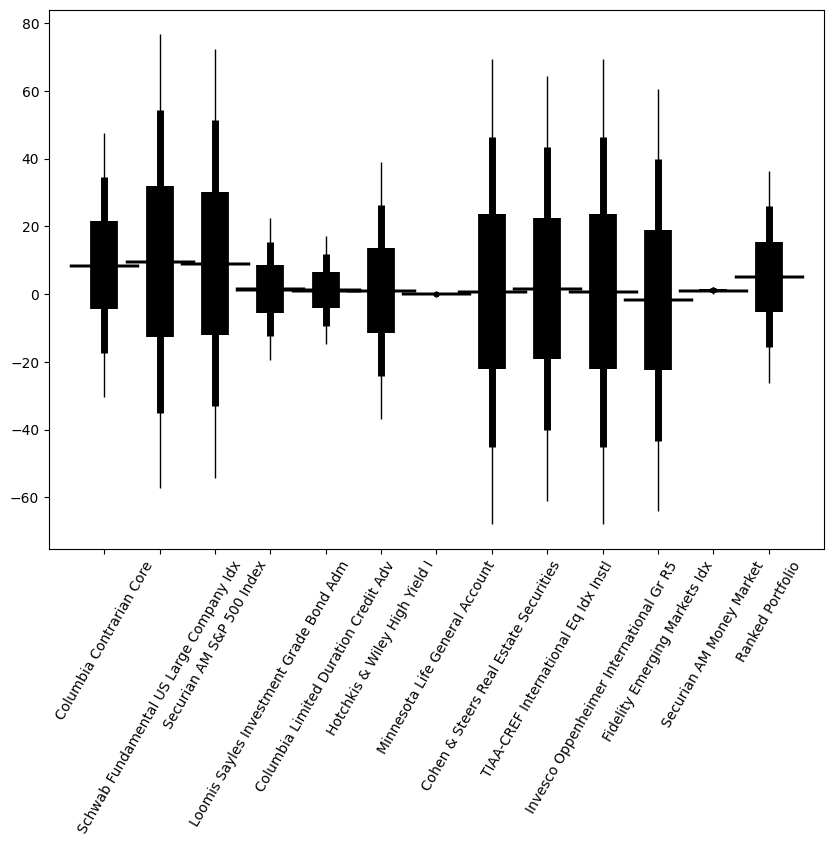

In [13]:
# Display Results.
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

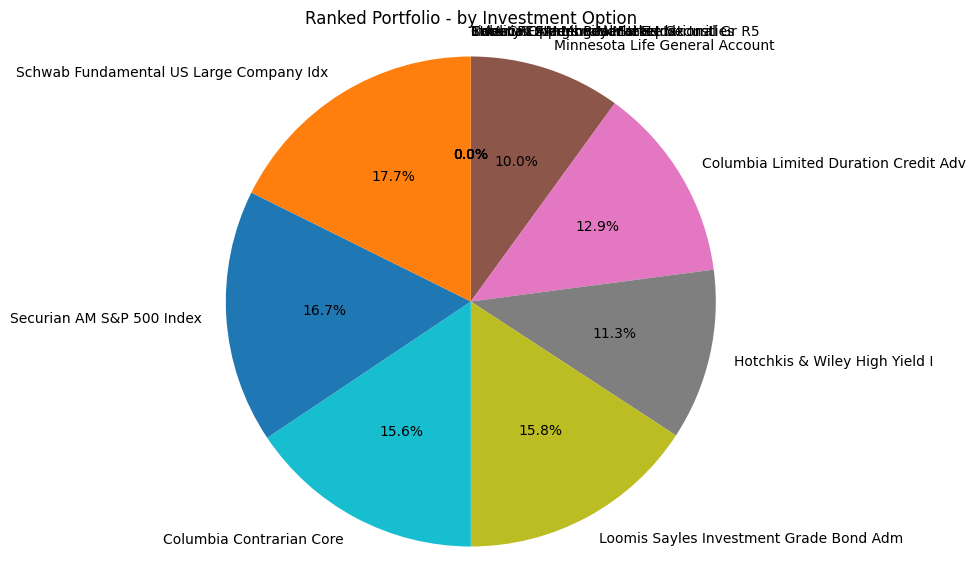

Securian AM Money Market                  0.00
TIAA-CREF International Eq Idx Instl      0.00
Invesco Oppenheimer International Gr R5   0.00
Fidelity Emerging Markets Idx             0.00
Cohen & Steers Real Estate Securities     0.00
Minnesota Life General Account            0.10
Columbia Limited Duration Credit Adv      0.13
Hotchkis & Wiley High Yield I             0.11
Loomis Sayles Investment Grade Bond Adm   0.16
Columbia Contrarian Core                  0.16
Securian AM S&P 500 Index                 0.17
Schwab Fundamental US Large Company Idx   0.18



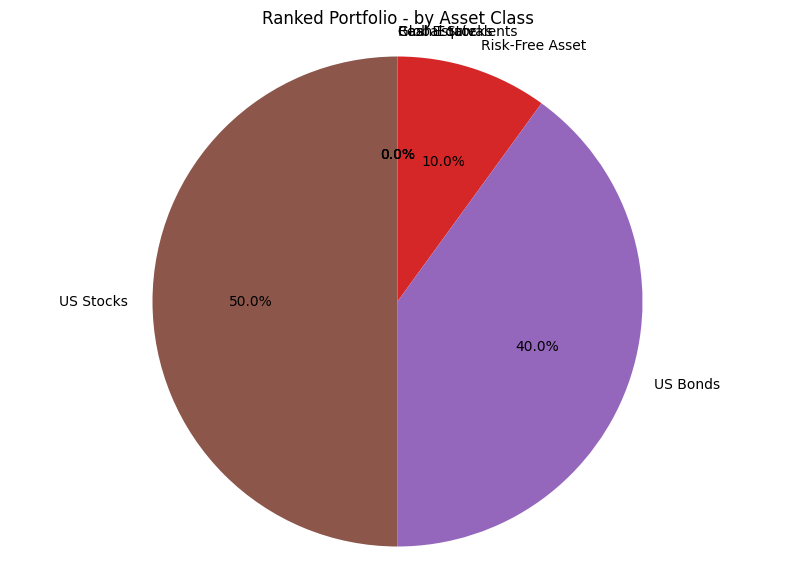

Cash Equivalents   0.00
Global Stocks      0.00
Real Estate        0.00
Risk-Free Asset    0.10
US Bonds           0.40
US Stocks          0.50



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Class'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    Columbia Contrarian Core       0.1561
    Schwab Fundamental US Large Company Idx 0.1767
    Securian AM S&P 500 Index      0.1672
    Loomis Sayles Investment Grade Bond Adm 0.1579
    Columbia Limited Duration Credit Adv 0.1292
    Hotchkis & Wiley High Yield I  0.1128
    Minnesota Life General Account 0.1000
    Cohen & Steers Real Estate Securities 0.0000
    TIAA-CREF International Eq Idx Instl 0.0000
    Invesco Oppenheimer International Gr R5 0.0000
    Fidelity Emerging Markets Idx  0.0000
    Securian AM Money Market       0.0000


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete.
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': -20
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer

Impossible criteria specified, lower your expectations!!!


### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).